### Import your librares

In [1]:
pip install category_encoders

     -------------------------------------- 81.9/81.9 kB 770.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce

In [10]:
import missingno as msno

In [18]:
import seaborn as sns

In [31]:
import plotly.express as px

### Load your dataset

In [3]:
df = pd.read_csv("seattle_weather.csv")

In [4]:
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


### Handle missing data in PRCP and RAIN columns

In [7]:
df.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

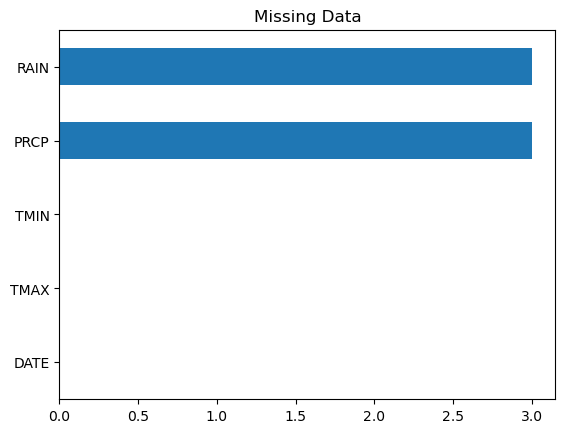

In [8]:
df.isnull().sum().sort_values().plot(kind="barh", title="Missing Data");

In [12]:
df['PRCP'].fillna(method="bfill", inplace =True)

In [14]:
df['RAIN'].fillna(method="bfill", inplace =True)

In [15]:
df.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

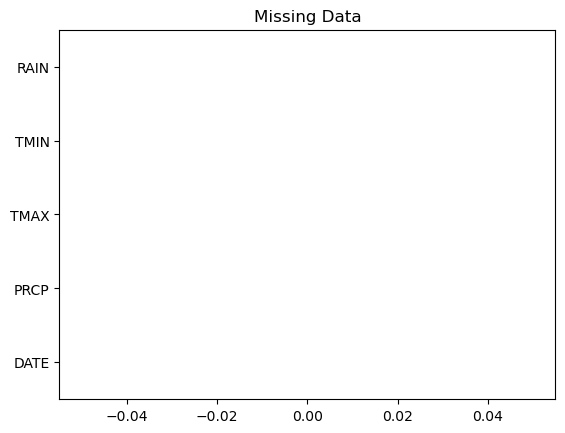

In [16]:
df.isnull().sum().sort_values().plot(kind="barh", title="Missing Data");

### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


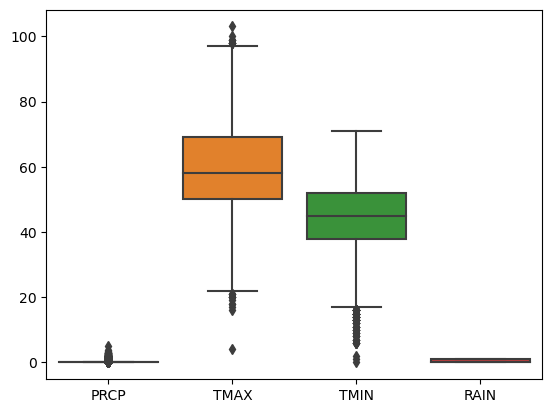

In [44]:
sns.boxplot(data=df);

In [34]:
fig = px.box(df, y='TMAX')

fig.show()

In [35]:
fig = px.box(df, y='TMIN')

fig.show()

In [36]:

fig = px.box(df, y='PRCP')

fig.show()

In [37]:
fig = px.box(df, y='DATE')

fig.show()

In [38]:
df['TMAX'].describe()

count    25551.000000
mean        59.544206
std         12.772984
min          4.000000
25%         50.000000
50%         58.000000
75%         69.000000
max        103.000000
Name: TMAX, dtype: float64

In [48]:
upper_limit = df['TMAX'].mean() + 3*df['TMAX'].std()
lower_limit = df['TMAX'].mean() - 3*df['TMAX'].std()
print(upper_limit)
print(lower_limit)

97.86315677274104
21.225254639728142


In [53]:
df = df.drop(df[(df['TMAX'] > 97.86315677274104) | (df['TMAX'] < 21.225254639728142)].index)
df["TMAX"]

0        51
1        45
2        45
3        45
4        45
         ..
25546    49
25547    49
25548    46
25549    48
25550    50
Name: TMAX, Length: 25527, dtype: int64

In [50]:
upper_limit = df['PRCP'].mean() + 3*df['PRCP'].std()
lower_limit = df['PRCP'].mean() - 3*df['PRCP'].std()
print(upper_limit)
print(lower_limit)

0.8232697398376073
-0.6108514391840104


In [54]:
df = df.drop(df[(df['PRCP'] > 0.8232697398376073) | (df['PRCP'] < -0.6108514391840104)].index)
df["PRCP"]

0        0.47
1        0.59
2        0.42
3        0.31
4        0.17
         ... 
25546    0.00
25547    0.00
25548    0.00
25549    0.00
25550    0.00
Name: PRCP, Length: 24963, dtype: float64

In [51]:
upper_limit = df['TMIN'].mean() + 3*df['TMIN'].std()
lower_limit = df['TMIN'].mean() - 3*df['TMIN'].std()
print(upper_limit)
print(lower_limit)

71.19273367629843
17.835719221826896


In [55]:
df = df.drop(df[(df['TMIN'] > 71.19273367629843) | (df['TMIN'] < 17.835719221826896)].index)
df["TMIN"]

0        42
1        36
2        35
3        34
4        32
         ..
25546    34
25547    29
25548    32
25549    34
25550    36
Name: TMIN, Length: 24870, dtype: int64

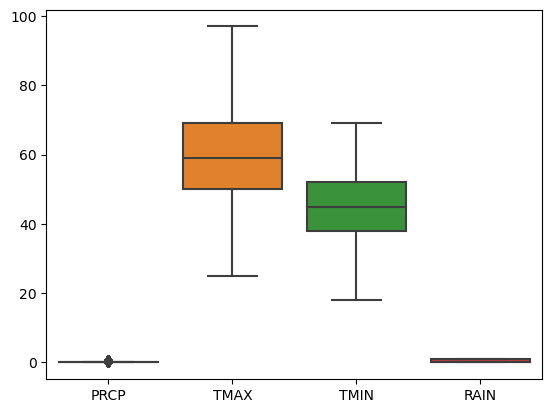

In [56]:
sns.boxplot(data=df);